# Accident Severity Prediction

## Introduction

The objective of this project is to develop classification models to accurately predict the severity of an accident based on given conditions.  

## Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [3]:
df0=pd.read_csv('Data-Collisions.CSV')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data visualization and Pre-processing

Target column: EVERITYCODE (Code 1 for property damage, Code 2 for injury)


In [4]:
df0['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

SeverityRatio function calculates the number of accidents with injuries over the number of accidents with property damage.

In [5]:
def SeverityRatio(df):
    Ratio = round((((df.loc[df['SEVERITYCODE']==2]).shape[0])/((df.loc[df['SEVERITYCODE']==1]).shape[0])),2)
    return Ratio

In [6]:
SeverityRatio(df0)

0.43

In [7]:
for column in df0.columns:
    print(column+" : "+str(len(df0[column].unique())))

SEVERITYCODE : 2
X : 23564
Y : 23840
OBJECTID : 194673
INCKEY : 194673
COLDETKEY : 194673
REPORTNO : 194670
STATUS : 2
ADDRTYPE : 4
INTKEY : 7615
LOCATION : 24103
EXCEPTRSNCODE : 3
EXCEPTRSNDESC : 2
SEVERITYCODE.1 : 2
SEVERITYDESC : 2
COLLISIONTYPE : 11
PERSONCOUNT : 47
PEDCOUNT : 7
PEDCYLCOUNT : 3
VEHCOUNT : 13
INCDATE : 5985
INCDTTM : 162058
JUNCTIONTYPE : 8
SDOT_COLCODE : 39
SDOT_COLDESC : 39
INATTENTIONIND : 2
UNDERINFL : 5
WEATHER : 12
ROADCOND : 10
LIGHTCOND : 10
PEDROWNOTGRNT : 2
SDOTCOLNUM : 114933
SPEEDING : 2
ST_COLCODE : 116
ST_COLDESC : 63
SEGLANEKEY : 1955
CROSSWALKKEY : 2198
HITPARKEDCAR : 2


In [8]:
df = df0.drop(['X', 'Y', 'OBJECTID','INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS','INTKEY', 'LOCATION', 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1','SEVERITYDESC','INCDATE','SDOT_COLCODE', 'SDOT_COLDESC','SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1)

In [9]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [10]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [11]:
df['INATTENTIONIND'].fillna('N', inplace=True)
df['INATTENTIONIND'].value_counts()

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [12]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [13]:
df['UNDERINFL'].fillna('N', inplace=True)
df.loc[:, 'UNDERINFL'].replace({ '0' : 'N', '1' : 'Y'}, inplace=True)
df['UNDERINFL'].value_counts()

N    185552
Y      9121
Name: UNDERINFL, dtype: int64

In [14]:
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [15]:
df['PEDROWNOTGRNT'].fillna('N', inplace=True)
df['PEDROWNOTGRNT'].value_counts()

N    190006
Y      4667
Name: PEDROWNOTGRNT, dtype: int64

In [16]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [17]:
df['SPEEDING'].fillna('N', inplace=True)
df['SPEEDING'].value_counts()

N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [18]:
df['HITPARKEDCAR'].unique()

array(['N', 'Y'], dtype=object)

In [19]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

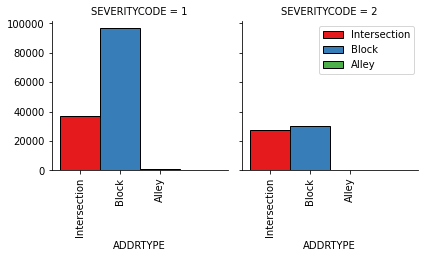

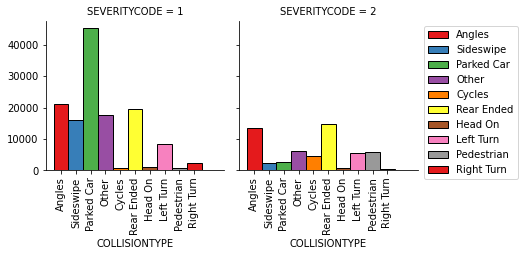

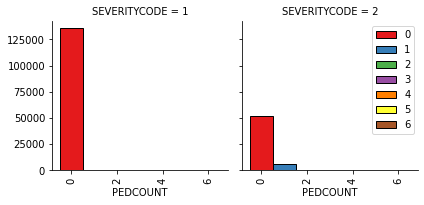

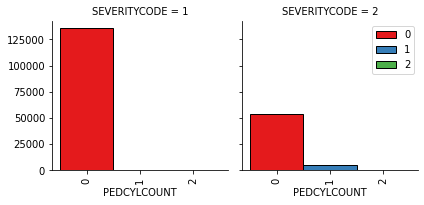

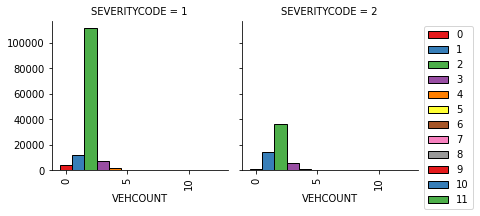

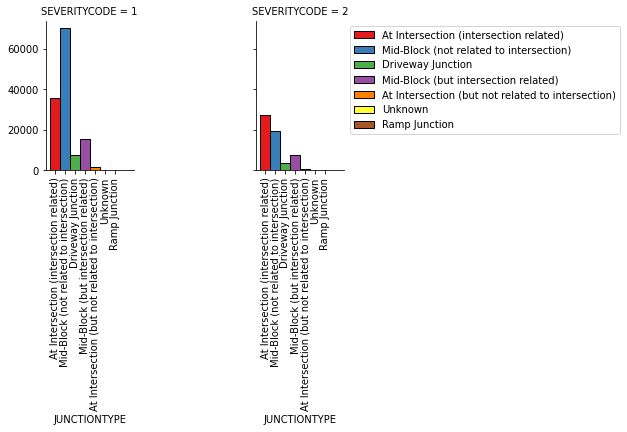

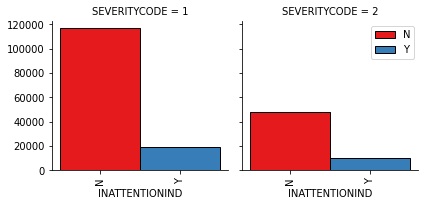

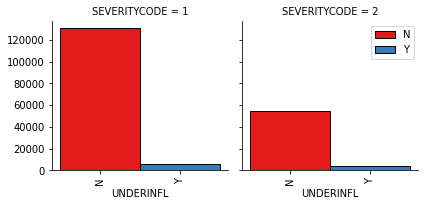

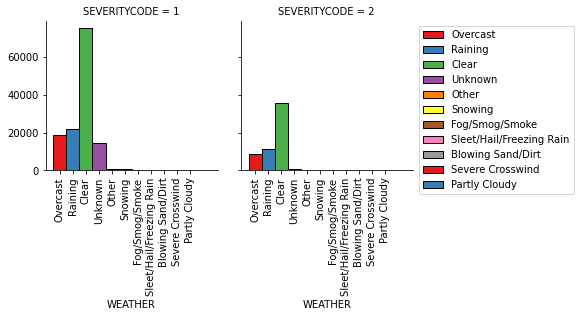

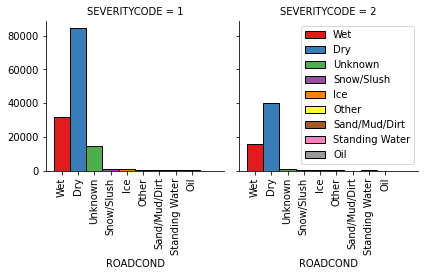

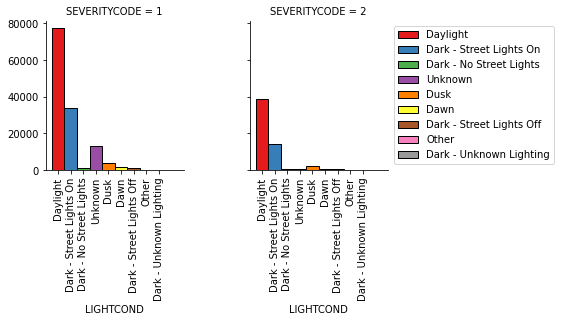

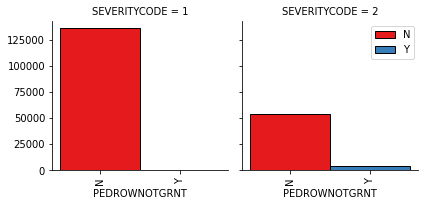

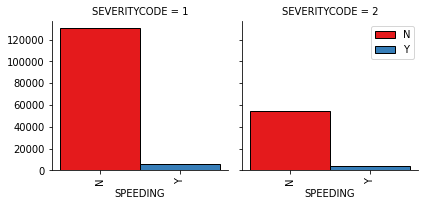

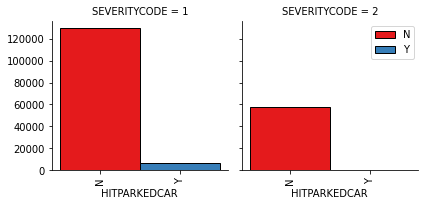

In [20]:
import seaborn as sns

for column in ['ADDRTYPE', 'COLLISIONTYPE', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'HITPARKEDCAR']:
    bins = np.arange(len(df[column].unique())+1)
    g = sns.FacetGrid(df, col="SEVERITYCODE", hue=column, palette="Set1", col_wrap=2)
    g.map(plt.hist, column, bins=bins-0.5, ec="k")
    g.axes[-1].legend(bbox_to_anchor=(1.01, 1))
    g.set_xticklabels(rotation=90)
    plt.show()
    
    
    

In [21]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['DAYOFWEEK'] = df['INCDTTM'].dt.dayofweek
df['HOUR'] = df['INCDTTM'].dt.hour
df.drop('INCDTTM', axis=1, inplace=True)

In [22]:
HOUR=[]
HOUR_Ratio=[]
HOUR_Ratio_Dict={}
for i in range(0,24):
    HOUR.append(int(i))
    HOUR_Ratio.append(SeverityRatio(df.loc[df['HOUR'] == i]))
    HOUR_Ratio_Dict[i]=float(SeverityRatio(df.loc[df['HOUR'] == i]))

HOUR_Ratio_Dict

{0: 0.37,
 1: 0.32,
 2: 0.32,
 3: 0.27,
 4: 0.29,
 5: 0.42,
 6: 0.47,
 7: 0.49,
 8: 0.46,
 9: 0.43,
 10: 0.4,
 11: 0.41,
 12: 0.4,
 13: 0.43,
 14: 0.47,
 15: 0.48,
 16: 0.49,
 17: 0.53,
 18: 0.52,
 19: 0.46,
 20: 0.39,
 21: 0.41,
 22: 0.39,
 23: 0.32}

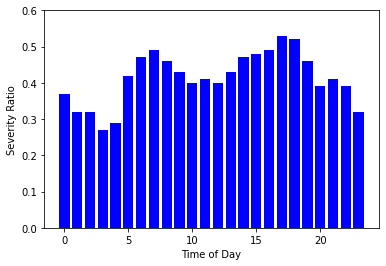

In [23]:
plt.bar(HOUR, HOUR_Ratio, color='blue')
plt.xlabel("Time of Day")
plt.ylabel("Severity Ratio")
plt.ylim(0,0.6)
plt.show()

In [24]:
Day=[]
Day_Ratio=[]
for i in range(0,7):
    Day.append(i)
    Day_Ratio.append(SeverityRatio(df.loc[df['DAYOFWEEK'] == i]))
    print('Day ='+str(i)+':   '+str(SeverityRatio(df.loc[df['DAYOFWEEK'] == i])))

Day =0:   0.43
Day =1:   0.44
Day =2:   0.44
Day =3:   0.44
Day =4:   0.42
Day =5:   0.42
Day =6:   0.38


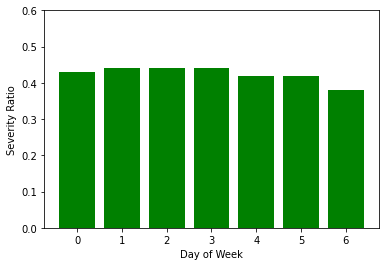

In [25]:
plt.bar(Day, Day_Ratio, color='green')
plt.xlabel("Day of Week")
plt.ylabel("Severity Ratio")
plt.ylim(0,0.6)
plt.show()

In [26]:
for column in df.columns:
    print(df.groupby([column])['SEVERITYCODE'].value_counts(normalize=True))
    print()

SEVERITYCODE  SEVERITYCODE
1             1               1.0
2             2               1.0
Name: SEVERITYCODE, dtype: float64

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1        

In [27]:
df.drop(['PERSONCOUNT','VEHCOUNT'], axis=1, inplace=True)

### Convert categorical varables to binary variables 

In [28]:
df = pd.concat([df,pd.get_dummies(df['ADDRTYPE'])], axis=1)
df.drop('ADDRTYPE', axis=1, inplace=True)

In [29]:
df = pd.concat([df,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
df.drop('COLLISIONTYPE', axis=1, inplace=True)
df.drop('Other', axis=1, inplace=True)

In [30]:
df = pd.concat([df,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
df.drop('JUNCTIONTYPE', axis=1, inplace=True)
df.drop('Unknown', axis=1, inplace=True)

In [31]:
df.loc[:,'INATTENTIONIND'].replace({ 'N' : 0, 'Y' : 1}, inplace=True)
df['INATTENTIONIND'].unique()

array([0, 1], dtype=int64)

In [32]:
df.loc[:,'UNDERINFL'].replace({ 'N' : 0, 'Y' : 1}, inplace=True)
df['UNDERINFL'].unique()

array([0, 1], dtype=int64)

In [33]:
df = pd.concat([df,pd.get_dummies(df['WEATHER'])], axis=1)
df.drop('WEATHER', axis=1, inplace=True)
df.drop(['Clear','Other', 'Unknown'], axis=1, inplace=True)

In [34]:
df = pd.concat([df,pd.get_dummies(df['ROADCOND'])], axis=1)
df.drop('ROADCOND', axis=1, inplace=True)
df.drop(['Other', 'Unknown'], axis=1, inplace=True)

In [35]:
df = pd.concat([df,pd.get_dummies(df['LIGHTCOND'])], axis=1)
df.drop(['LIGHTCOND', 'Dark - Unknown Lighting'], axis=1, inplace=True)
df.drop(['Other', 'Unknown'], axis=1, inplace=True)

In [36]:
df.loc[:,'PEDROWNOTGRNT'].replace({ 'N' : 0, 'Y' : 1}, inplace=True)
df['PEDROWNOTGRNT'].unique()

array([0, 1], dtype=int64)

In [37]:
df.loc[:,'SPEEDING'].replace({ 'N' : 0, 'Y' : 1}, inplace=True)
df['SPEEDING'].unique()

array([0, 1], dtype=int64)

In [38]:
df.loc[:,'HITPARKEDCAR'].replace({ 'N' : 0, 'Y' : 1}, inplace=True)
df['HITPARKEDCAR'].unique()

array([0, 1], dtype=int64)

In [39]:
df['HOUR_RATIO']= df['HOUR'].map(HOUR_Ratio_Dict) 

In [40]:
df['HOUR_RATIO_LEVEL']=pd.cut(x=df['HOUR_RATIO'], bins=3, labels=['LOW_RATIO_HOUR', 'MEDIUM_RATIO_HOUR', 'HIGH_RATIO_HOUR'])

In [41]:
df = pd.concat([df,pd.get_dummies(df['HOUR_RATIO_LEVEL'])], axis=1)
df.drop(['HOUR', 'HOUR_RATIO', 'HOUR_RATIO_LEVEL'], axis=1, inplace=True)

In [42]:
df.drop('DAYOFWEEK', axis=1, inplace=True)

In [43]:
df.reset_index(drop=True, inplace=True)

In [44]:
df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,LOW_RATIO_HOUR,MEDIUM_RATIO_HOUR,HIGH_RATIO_HOUR
0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


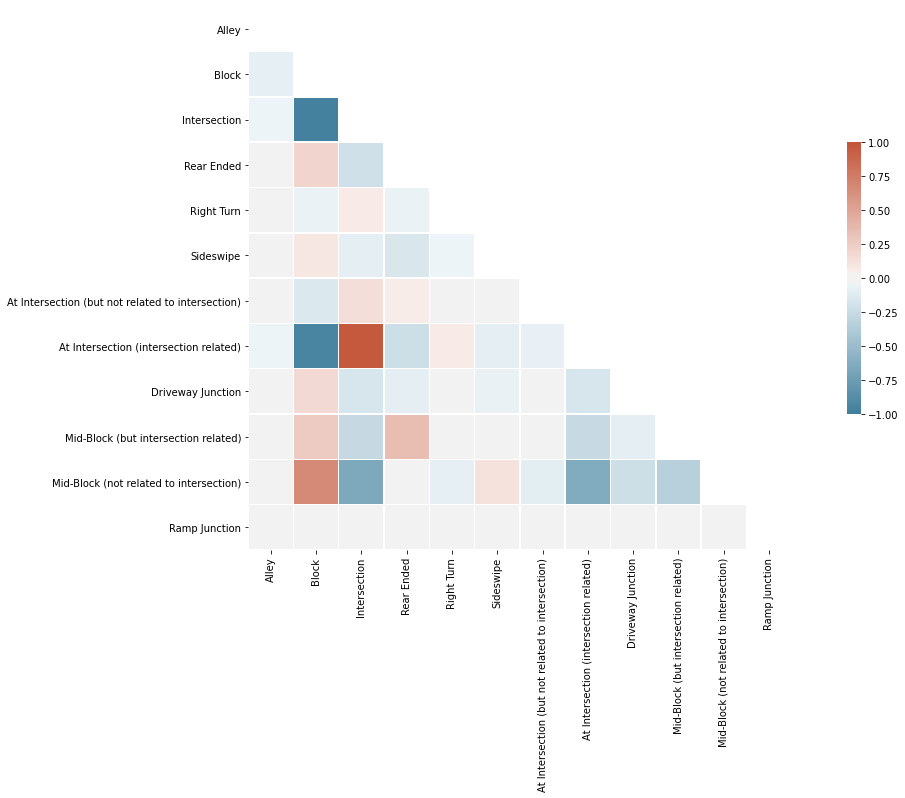

In [45]:

corr = df[['Alley','Block', 'Intersection','Rear Ended', 'Right Turn', 'Sideswipe', 'At Intersection (but not related to intersection)', 'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'Ramp Junction']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
 df[['Alley','Block', 'Intersection','Rear Ended', 'Right Turn', 'Sideswipe', 'At Intersection (but not related to intersection)', 'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'Ramp Junction']].corr()

,Alley,Block,Intersection,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
Alley,1.000000,-0.085180,-0.044095,-0.026275,-0.007727,-0.015723,-0.005693,-0.042950,0.006492,-0.022660,-0.028329,-0.001818
Block,-0.085180,1.000000,-0.969869,0.210350,-0.061493,0.088904,-0.142763,-0.944584,0.173096,0.265490,0.665878,0.009151
Intersection,-0.044095,-0.969869,1.000000,-0.206280,0.064288,-0.085962,0.146884,0.973373,-0.170637,-0.257977,-0.655436,-0.009135
Rear Ended,-0.026275,0.210350,-0.206280,1.000000,-0.057212,-0.149792,0.060818,-0.221313,-0.087265,0.348300,0.029844,0.013859
Right Turn,-0.007727,-0.061493,0.064288,-0.057212,1.000000,-0.040369,0.004940,0.063912,0.015127,0.029130,-0.080269,-0.003628
Sideswipe,-0.015723,0.088904,-0.085962,-0.149792,-0.040369,1.000000,0.007521,-0.088460,-0.063786,0.006058,0.117822,0.010853
At Intersection (but not related to intersection),-0.005693,-0.142763,0.146884,0.060818,0.004940,0.007521,1.000000,-0.072037,-0.025136,-0.038007,-0.096585,-0.003049
At Intersection (intersection related),-0.042950,-0.944584,0.973373,-0.221313,0.063912,-0.088460,-0.072037,1.000000,-0.166205,-0.251309,-0.638645,-0.020162
Driveway Junction,0.006492,0.173096,-0.170637,-0.087265,0.015127,-0.063786,-0.025136,-0.166205,1.000000,-0.087689,-0.222842,-0.007035
Mid-Block (but intersection related),-0.022660,0.265490,-0.257977,0.348300,0.029130,0.006058,-0.038007,-0.251309,-0.087689,1.000000,-0.336947,-0.010638


In [47]:
df.drop(['Block', 'Intersection'], axis=1, inplace=True)

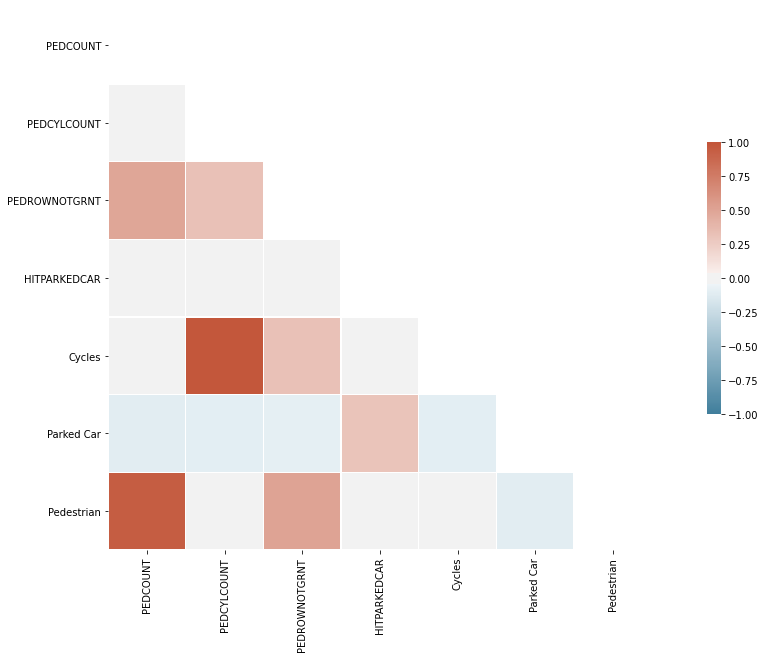

In [48]:

corr = df[['PEDCOUNT', 'PEDCYLCOUNT', 'PEDROWNOTGRNT', 'HITPARKEDCAR', 'Cycles','Parked Car', 'Pedestrian']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
df.drop(['Cycles','Pedestrian'], axis=1, inplace=True)

In [50]:
df.columns

Index(['SEVERITYCODE', 'PEDCOUNT', 'PEDCYLCOUNT', 'INATTENTIONIND',
       'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'Alley',
       'Angles', 'Head On', 'Left Turn', 'Parked Car', 'Rear Ended',
       'Right Turn', 'Sideswipe',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Blowing Sand/Dirt', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy',
       'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water',
       'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk', 'LOW_RATIO_HOUR',
       'MEDIUM_RATIO_HOUR', 'HIGH_RATIO_HOUR'],
      dtype='object')

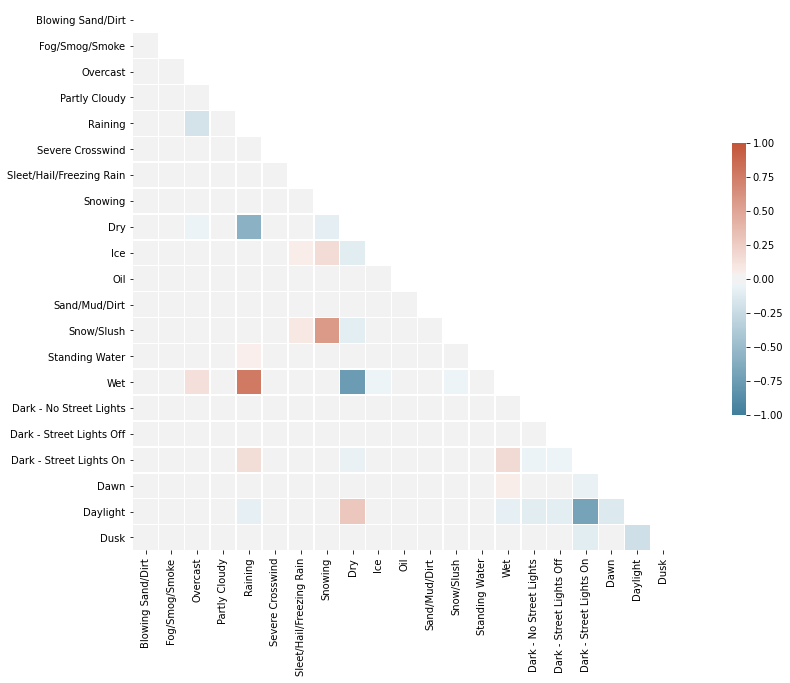

In [51]:
     
corr = df[['Blowing Sand/Dirt', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy',
       'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water',
       'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})        

In [52]:
df.drop(['Dry','Wet','Snow/Slush','Dark - Street Lights On'], axis=1, inplace=True)

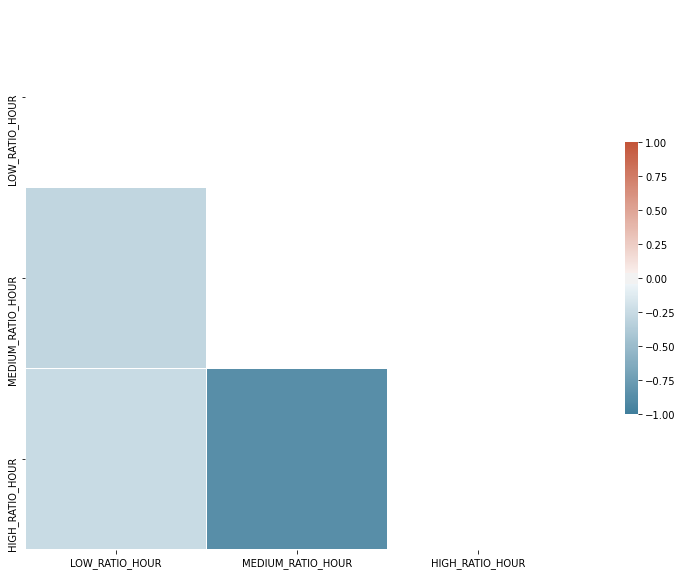

In [53]:
corr = df[['LOW_RATIO_HOUR', 'MEDIUM_RATIO_HOUR', 'HIGH_RATIO_HOUR']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  


In [54]:
df[['LOW_RATIO_HOUR', 'MEDIUM_RATIO_HOUR', 'HIGH_RATIO_HOUR']].corr()

,LOW_RATIO_HOUR,MEDIUM_RATIO_HOUR,HIGH_RATIO_HOUR
LOW_RATIO_HOUR,1.000000,-0.284735,-0.243421
MEDIUM_RATIO_HOUR,-0.284735,1.000000,-0.860462
HIGH_RATIO_HOUR,-0.243421,-0.860462,1.000000


In [55]:
df.drop(['MEDIUM_RATIO_HOUR'], axis=1, inplace=True)

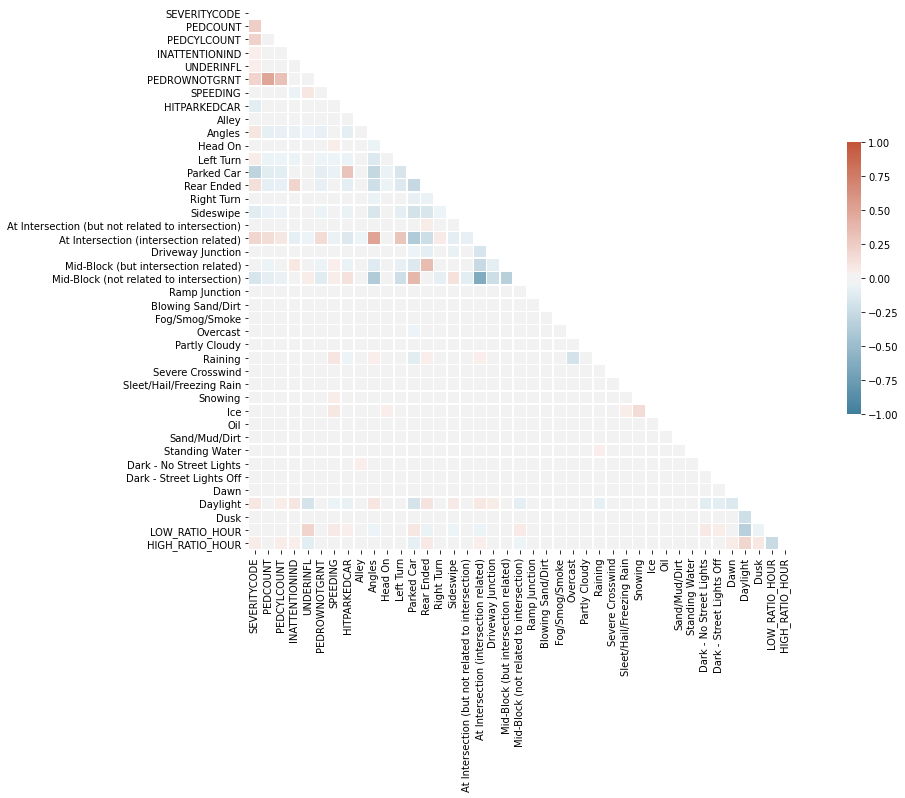

In [56]:
        
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})  

In [57]:
df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Alley,Angles,Head On,Left Turn,Parked Car,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Ice,Oil,Sand/Mud/Dirt,Standing Water,Dark - No Street Lights,Dark - Street Lights Off,Dawn,Daylight,Dusk,LOW_RATIO_HOUR,HIGH_RATIO_HOUR
0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Model Development

In [58]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y=df['SEVERITYCODE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [59]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### K Nearest Neighbor(KNN)

#### K-Fold Cross Validation

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


grid_params = [{ 'n_neighbors': [6, 7, 8, 9]}]

gs = GridSearchCV(KNeighborsClassifier(), grid_params, scoring='recall', cv=3, return_train_score=True)
gs.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(gs.best_params_)
print()
print("Grid scores on development set:")
print()
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, gs.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'n_neighbors': 8}

Grid scores on development set:

0.893 (+/-0.063) for {'n_neighbors': 6}

0.865 (+/-0.068) for {'n_neighbors': 7}

0.923 (+/-0.032) for {'n_neighbors': 8}

0.892 (+/-0.032) for {'n_neighbors': 9}

Detailed classification report:

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     40876
           2       0.61      0.31      0.41     17526

    accuracy                           0.73     58402
   macro avg       0.68      0.61      0.62     58402
weighted avg       0.71      0.73      0.70     58402




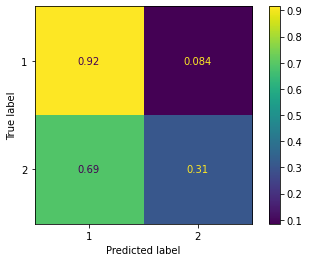

In [62]:
kNN_model = KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train)
plot_confusion_matrix(kNN_model, X_test, y_test, normalize='true')  
plt.show()

### Support Vector Machine

#### Fitting

In [63]:
from sklearn import svm
from sklearn.svm import SVC

SVM_model = svm.SVC(kernel='linear', C=1)
SVM_model.fit(X_train, y_train) 

SVC(C=1, kernel='linear')

#### Prediction

In [64]:
y_pred_SVM = SVM_model.predict(X_test)

#### Evaluation

In [65]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           1       0.74      0.99      0.85     40876
           2       0.90      0.19      0.31     17526

    accuracy                           0.75     58402
   macro avg       0.82      0.59      0.58     58402
weighted avg       0.79      0.75      0.69     58402



In [66]:
confusion_matrix(y_test, y_pred_SVM)

array([[40486,   390],
       [14194,  3332]], dtype=int64)

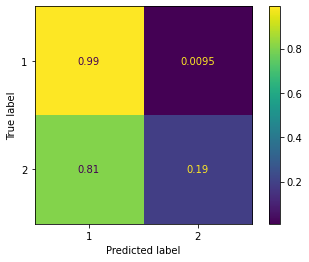

In [67]:
plot_confusion_matrix(SVM_model, X_test, y_test, normalize='true')  
plt.show()

### Decision Tree

#### Fitting

In [68]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

#### Prediction

In [69]:
y_pred_DT = DT_model.predict(X_test)

#### Evaluation

In [70]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           1       0.74      0.99      0.85     40876
           2       0.90      0.19      0.31     17526

    accuracy                           0.75     58402
   macro avg       0.82      0.59      0.58     58402
weighted avg       0.79      0.75      0.69     58402



In [72]:
confusion_matrix(y_test, y_pred_DT)

array([[40487,   389],
       [14201,  3325]], dtype=int64)

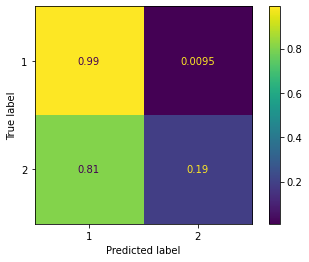

In [60]:
plot_confusion_matrix(DT_model, X_test, y_test, normalize='true')  
plt.show()

### Logistic Regression

#### K_Fold Cross Validation

In [74]:
from sklearn.linear_model import LogisticRegression


grid_params = [{ 'C': [0.01, 0.1, 1]}]

gs = GridSearchCV(LogisticRegression(max_iter=300), grid_params, scoring='recall', cv=3, return_train_score=True)
gs.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(gs.best_params_)
print()
print("Grid scores on development set:")
print()
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, gs.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'C': 0.01}

Grid scores on development set:

0.975 (+/-0.005) for {'C': 0.01}

0.969 (+/-0.004) for {'C': 0.1}

0.969 (+/-0.003) for {'C': 1}

Detailed classification report:

              precision    recall  f1-score   support

           1       0.75      0.97      0.84     40876
           2       0.78      0.23      0.36     17526

    accuracy                           0.75     58402
   macro avg       0.76      0.60      0.60     58402
weighted avg       0.76      0.75      0.70     58402




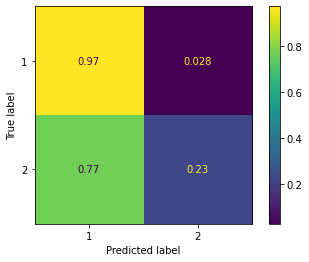

In [75]:
LR_model = LogisticRegression(C=0.01, max_iter=300).fit(X_train,y_train)
plot_confusion_matrix(LR_model, X_test, y_test, normalize='true')  
plt.show()

### Negative Sampling

In [60]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=20)

In [61]:
df_train['SEVERITYCODE'].value_counts()

1    95609
2    40662
Name: SEVERITYCODE, dtype: int64

In [62]:
df_train_Code1_balanced = df.loc[df['SEVERITYCODE']==1].sample(n=40662, random_state=0)

In [63]:
df_train_Code1_balanced['SEVERITYCODE'].value_counts()

1    40662
Name: SEVERITYCODE, dtype: int64

In [64]:
df_train_Code2 = df_train.loc[df_train['SEVERITYCODE']==2]

In [66]:
df_train_balanced=pd.concat([df_train_Code1_balanced, df_train_Code2]).reset_index(drop=True)
df_train_balanced = df_train_balanced.sample(frac=1).reset_index(drop=True)
df_train_balanced

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Alley,Angles,Head On,Left Turn,Parked Car,Rear Ended,Right Turn,Sideswipe,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Blowing Sand/Dirt,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Ice,Oil,Sand/Mud/Dirt,Standing Water,Dark - No Street Lights,Dark - Street Lights Off,Dawn,Daylight,Dusk,LOW_RATIO_HOUR,HIGH_RATIO_HOUR
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81319,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
81320,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
81321,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
81322,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
df_train_balanced['SEVERITYCODE'].value_counts()

2    40662
1    40662
Name: SEVERITYCODE, dtype: int64

In [68]:
X_train_balanced = df_train_balanced.iloc[:, 1:]
y_train_balanced = df_train_balanced['SEVERITYCODE'].values

In [69]:
X_test = df_test.iloc[:, 1:]
y_test = df_test['SEVERITYCODE'].values

### Logistic Regression

#### K_Fold Cross_Validation

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_params = [{ 'C': [0.01, 0.1, 1]}]

gs = GridSearchCV(LogisticRegression(max_iter=300), grid_params, scoring='recall', cv=3, return_train_score=True)
gs.fit(X_train_balanced, y_train_balanced)
print("Best parameters set found on development set:")
print()
print(gs.best_params_)
print()
print("Grid scores on development set:")
print()
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, gs.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'C': 1}

Grid scores on development set:

0.591 (+/-0.007) for {'C': 0.01}

0.603 (+/-0.004) for {'C': 0.1}

0.603 (+/-0.005) for {'C': 1}

Detailed classification report:

              precision    recall  f1-score   support

           1       0.88      0.61      0.72     40876
           2       0.47      0.81      0.59     17526

    accuracy                           0.67     58402
   macro avg       0.67      0.71      0.66     58402
weighted avg       0.76      0.67      0.68     58402




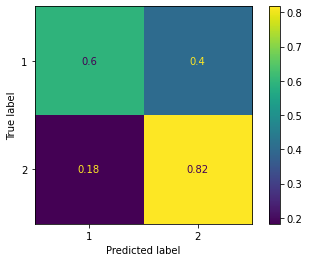

In [72]:
LR_model = LogisticRegression(C=0.01, max_iter=300).fit(X_train_balanced,y_train_balanced)
plot_confusion_matrix(LR_model, X_test, y_test, normalize='true')  
plt.show()

### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_model.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [74]:
y_pred_DT = DT_model.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           1       0.86      0.64      0.73     40876
           2       0.47      0.76      0.58     17526

    accuracy                           0.67     58402
   macro avg       0.67      0.70      0.66     58402
weighted avg       0.74      0.67      0.69     58402



In [76]:
confusion_matrix(y_test, y_pred_DT)

array([[25975, 14901],
       [ 4220, 13306]], dtype=int64)

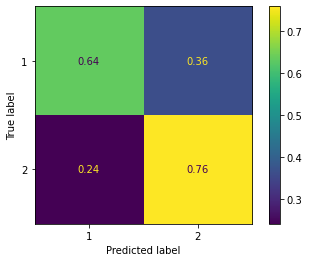

In [77]:
plot_confusion_matrix(DT_model, X_test, y_test, normalize='true')  
plt.show()

### SVM

In [78]:
from sklearn import svm
from sklearn.svm import SVC

SVM_model = svm.SVC(kernel='linear', C=1)
SVM_model.fit(X_train_balanced, y_train_balanced) 

SVC(C=1, kernel='linear')

In [79]:
y_pred_SVM = SVM_model.predict(X_test)

In [80]:
confusion_matrix(y_test, y_pred_SVM)

array([[25533, 15343],
       [ 3798, 13728]], dtype=int64)

In [85]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           1       0.87      0.62      0.73     40876
           2       0.47      0.78      0.59     17526

    accuracy                           0.67     58402
   macro avg       0.67      0.70      0.66     58402
weighted avg       0.75      0.67      0.69     58402



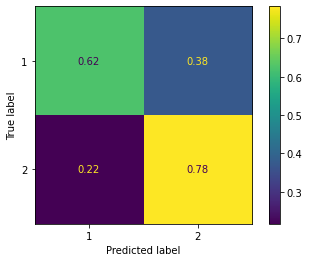

In [81]:
plot_confusion_matrix(SVM_model, X_test, y_test, normalize='true')  
plt.show()

### KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier


grid_params = [{ 'n_neighbors': [6, 7, 8, 9]}]

gs = GridSearchCV(KNeighborsClassifier(), grid_params, scoring='recall', cv=3, return_train_score=True)
gs.fit(X_train_balanced, y_train_balanced)
print("Best parameters set found on development set:")
print()
print(gs.best_params_)
print()
print("Grid scores on development set:")
print()
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, gs.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'n_neighbors': 6}

Grid scores on development set:

0.704 (+/-0.071) for {'n_neighbors': 6}

0.606 (+/-0.020) for {'n_neighbors': 7}

0.661 (+/-0.031) for {'n_neighbors': 8}

0.610 (+/-0.022) for {'n_neighbors': 9}

Detailed classification report:

              precision    recall  f1-score   support

           1       0.81      0.73      0.77     40876
           2       0.49      0.59      0.53     17526

    accuracy                           0.69     58402
   macro avg       0.65      0.66      0.65     58402
weighted avg       0.71      0.69      0.70     58402




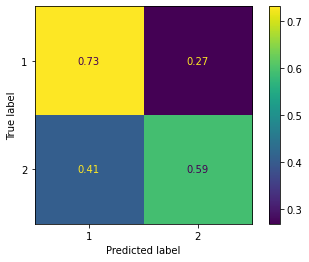

In [84]:
kNN_model = KNeighborsClassifier(n_neighbors=6).fit(X_train_balanced,y_train_balanced)
plot_confusion_matrix(kNN_model, X_test, y_test, normalize='true')  
plt.show()